In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
df.groupby(['Survived','Sex']).size().reset_index().rename(columns={0:'counts'})

,Survived,Sex,counts
0,0,0,81
1,0,1,468
2,1,0,233
3,1,1,109


<AxesSubplot:xlabel='Survived', ylabel='count'>

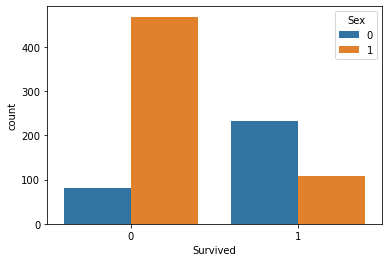

In [123]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df)

In [126]:
df.groupby(['Survived','Pclass']).size().reset_index().rename(columns={0:'counts'})

,Survived,Pclass,counts
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


<AxesSubplot:xlabel='Survived', ylabel='count'>

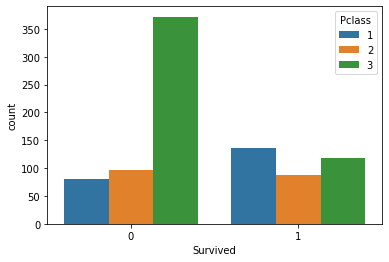

In [125]:
sns.countplot(x = 'Survived', hue = 'Pclass', data =df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

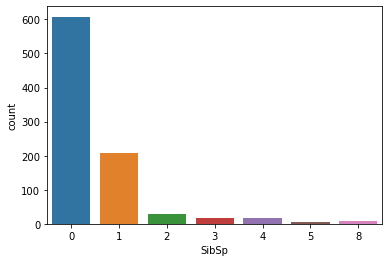

In [128]:
sns.countplot(x='SibSp',data=df)

In [129]:
df.groupby(['SibSp','Survived']).size().reset_index().rename(columns={0:'counts'})

,SibSp,Survived,counts
0,0,0,398
1,0,1,210
2,1,0,97
3,1,1,112
4,2,0,15
5,2,1,13
6,3,0,12
7,3,1,4
8,4,0,15
9,4,1,3


<AxesSubplot:xlabel='SibSp', ylabel='count'>

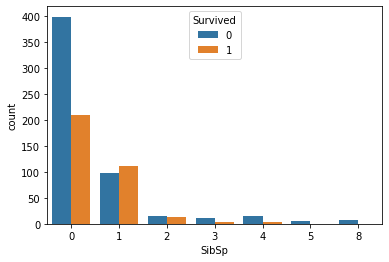

In [152]:
sns.countplot(x='SibSp',hue='Survived',data=df)


In [6]:
df.drop(columns=['Name','Ticket','Fare','PassengerId','Cabin'],inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [9]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [11]:
df['Sex']=df['Sex'].replace({'male':1,"female":0})

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [13]:
df['Embarked']=df['Embarked'].replace({'S':0,'C':1,'Q':2})

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x_age=np.array(df['Age'])

In [16]:
l=[]
for i in df['Age']:
    z=(i-df.Age.min())/(df.Age.max()-df.Age.min())
    l.append(z)

In [17]:
df['scaled_Age']=pd.Series(l)

In [18]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,scaled_Age
0,0,3,1,22.0,1,0,0,0.271174
1,1,1,0,38.0,1,0,1,0.472229


In [19]:
df.drop(columns=['Age'],inplace=True)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,scaled_Age
0,0,3,1,1,0,0,0.271174
1,1,1,0,1,0,1,0.472229
2,1,3,0,0,0,0,0.321438
3,1,1,0,1,0,0,0.434531
4,0,3,1,0,0,0,0.434531
...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0.334004
887,1,1,0,0,0,0,0.233476
888,0,3,0,1,2,0,0.346569
889,1,1,1,0,0,1,0.321438


In [22]:
X=df.drop(columns=['Survived'])
Y=df['Survived']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [84]:
log_reg=LogisticRegression()

In [85]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [86]:
y_pred=log_reg.predict(x_test)

In [87]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [89]:
acc=accuracy_score(y_test,y_pred)

In [90]:
acc

0.7932960893854749

In [91]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[92, 18],
       [19, 50]], dtype=int64)

In [92]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7805006587615284

In [93]:
import matplotlib.pyplot as plt

In [94]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [95]:
print(fpr,tpr,thresholds)

[0.         0.16363636 1.        ] [0.         0.72463768 1.        ] [2 1 0]


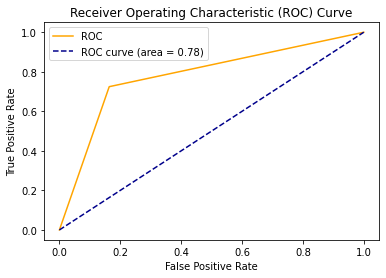

In [96]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import f1_score

In [98]:
f1=f1_score(y_test,y_pred)

In [99]:
f1

0.7299270072992701